In [ ]:
Asumiendo que es una serie estacionaria

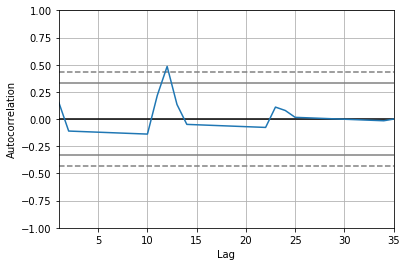

In [17]:
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

# series = read_csv('../data/interim/shampoo.csv', header=0, parse_dates=[0], index_col=0, squeeze=True, date_parser=parser)
series =  pd.read_parquet('../data/interim/01-ventas.parquet').set_index('fecha')[lambda df: df.id_pos == 4761][["unidades"]]
series
autocorrelation_plot(series)
pyplot.show()


In [96]:
from statsmodels.tsa.arima_model import ARIMA
# fit model 1, 12, 
model = ARIMA(series, order=(1,0,0))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:               unidades   No. Observations:                   35
Model:                     ARMA(1, 0)   Log Likelihood                -177.093
Method:                       css-mle   S.D. of innovations             38.111
Date:                Wed, 17 Jul 2019   AIC                            360.187
Time:                        12:50:21   BIC                            364.853
Sample:                    01-31-2012   HQIC                           361.798
                         - 11-30-2014                                         
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             13.7339      7.635      1.799      0.081      -1.231      28.699
ar.L1.unidades     0.1602      0.171      0.939      0.355      -0.174       0.494
                                    

/home/jloscalzo/Projects/ECI-2019/Predicción ventas estacionales/venv/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  % freq, ValueWarning)


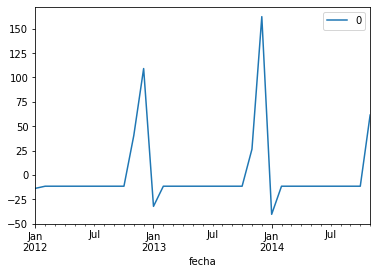

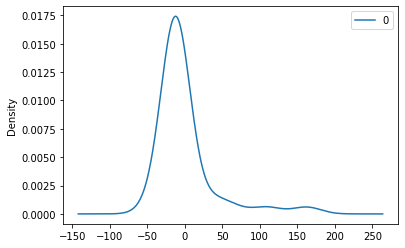

                0
count   35.000000
mean     0.062752
std     38.669150
min    -40.362234
25%    -11.534352
50%    -11.534352
75%    -11.534352
max    162.379762


In [97]:
# plot residual errors
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [98]:
model_fit.predict(start=1, end=len(series))

2012-02-29    11.534352
2012-03-31    11.534352
2012-04-30    11.534352
2012-05-31    11.534352
2012-06-30    11.534352
2012-07-31    11.534352
2012-08-31    11.534352
2012-09-30    11.534352
2012-10-31    11.534352
2012-11-30    11.534352
2012-12-31    19.862407
2013-01-31    32.194334
2013-02-28    11.534352
2013-03-31    11.534352
2013-04-30    11.534352
2013-05-31    11.534352
2013-06-30    11.534352
2013-07-31    11.534352
2013-08-31    11.534352
2013-09-30    11.534352
2013-10-31    11.534352
2013-11-30    11.534352
2013-12-31    17.620238
2014-01-31    40.362234
2014-02-28    11.534352
2014-03-31    11.534352
2014-04-30    11.534352
2014-05-31    11.534352
2014-06-30    11.534352
2014-07-31    11.534352
2014-08-31    11.534352
2014-09-30    11.534352
2014-10-31    11.534352
2014-11-30    11.534352
2014-12-31    23.225660
Freq: M, dtype: float64

In [95]:
model_fit.forecast()[0]

TypeError: Cannot cast ufunc subtract output from dtype('float64') to dtype('int64') with casting rule 'same_kind'

In [89]:
series

,unidades
fecha,
2012-01-31,0
2012-02-29,0
2012-03-31,0
2012-04-30,0
2012-05-31,0
2012-06-30,0
2012-07-31,0
2012-08-31,0
2012-09-30,0
